<a href="https://colab.research.google.com/github/JuanCVanegas/Practical_Cases/blob/main/Credit_Card_Approving_Definitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

### Company Name:
Major Credit Card Company  

### Problem Type:
Binary Classification

### Business Problem:

Determine to which client the company should issue a credit card, minimizing the probability of a default.  

### Business Goal:

Build a machine learning model to predict if an applicant is 'good' or 'bad' client.



# Import Main Libraries

In [ ]:
#import main libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
df1 = pd.read_csv('application_record.csv')
df2 = pd.read_csv('credit_record.csv')

Mounted at /content/drive


# Data Entry and Overview

In [ ]:
# remove the restriction on the output of columns
# and let's check number of rows and columns:
pd.set_option('display.max_columns', None)
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
# we will have to transform some data, get rid of unnecessary data, as well as missing data.

df1['ID'].nunique()

438510

In [ ]:
df2['ID'].nunique()

45985

In [ ]:
len(set(df1['ID']).intersection(set(df2['ID']))) # checking to see how many records match in two

36457

# Data Processing and Analysis

In [ ]:
df1.isnull().sum()

# About a quarter of the data in OCCUPATION_TYPE is lost. We have to remove this variable.

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
df2.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
# Now, we should remove duplicates

df1 = df1.drop_duplicates('ID', keep='last')

In [ ]:
# Now, we should remove OCCUPATION_TYPE. As we said, it have too many missed data
# In addition, we will get rid of FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE and FLAG_EMAIL.
# These parameters do not affect in any way whether a person is creditworthy or not.

df1.drop(['OCCUPATION_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1, inplace=True)

In [ ]:
# The next step involves parsing the object data types.
# This is important for assessing if they contain any valuable information for credit evaluation
# And for considering the feasibility of converting the data into a numeric format.

objects_df1 = pd.DataFrame(df1.dtypes =='object').reset_index()
object_type = objects_df1[objects_df1[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [ ]:
#  To ensure proper training of our model, let's first examine the data contained in the columns
#  Given the significant number of important parameters, our goal is to convert this information into numerical values.

a = df1[object_type]['CODE_GENDER'].value_counts()
b = df1[object_type]['FLAG_OWN_CAR'].value_counts()
c = df1[object_type]['FLAG_OWN_REALTY'].value_counts()
d = df1[object_type]['NAME_INCOME_TYPE'].value_counts()
e = df1[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = df1[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = df1[object_type]['NAME_HOUSING_TYPE'].value_counts()

print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 F    294412
M    144098
Name: CODE_GENDER, dtype: int64 

 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 

 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 

 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 

 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 

 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 

 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
N

In [ ]:
# Now, let's convert all non-numeric data to numeric data using LabelEncoder().
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df1:
    if df1[x].dtypes == 'object':
        df1[x] = le.fit_transform(df1[x])

In [ ]:
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0


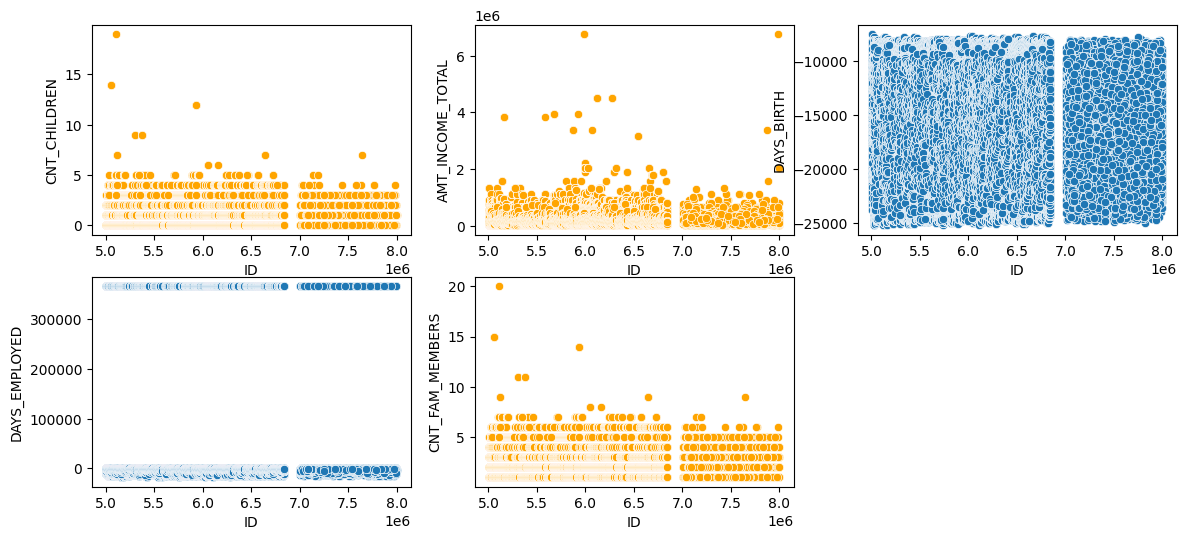

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df1, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df1, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df1, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df1, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df1, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

# Outlier Handling

In [ ]:
#we have outliers in CNT_CHILDREN, AMT_INCOME_TOTAL and CNT_FAM_MEMBER
#This may hurt our model performance, so we need to remove them

# for CNT_CHILDREN
q_hi = df1['CNT_CHILDREN'].quantile(0.999)
q_low = df1['CNT_CHILDREN'].quantile(0.001)
df1 = df1[(df1['CNT_CHILDREN']>q_low) & (df1['CNT_CHILDREN']<q_hi)]

In [ ]:
# for AMT_INCOME_TOTAL
q_hi = df1['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = df1['AMT_INCOME_TOTAL'].quantile(0.001)
df1 = df1[(df1['AMT_INCOME_TOTAL']>q_low) & (df1['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
# for CNT_FAM_MEMBERS
q_hi = df1['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = df1['CNT_FAM_MEMBERS'].quantile(0.001)
df1 = df1[(df1['CNT_FAM_MEMBERS']>q_low) & (df1['CNT_FAM_MEMBERS']<q_hi)]

# Data Merge

In [ ]:
df2['STATUS'].value_counts()


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
df2.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [ ]:
# Any bank will not lend to a person who is already in debt,
# so let 0 be no debt at all and -1 any debt at all.
df2['STATUS'].replace({'C': -1, 'X' : -1}, inplace=True)
df2['STATUS'] = df2['STATUS'].astype('int')
df2['STATUS'] = df2['STATUS'].apply(lambda x:1 if x > 0 else 0)

In [ ]:
# This way we can successfully link both tables.
# For convenience, we'll make the ID the index of the table.

df2id = df2.groupby('ID').agg(max).reset_index()
df2id

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


In [ ]:
# Now, we create a new dataset

data = df1.join(df2id.set_index('ID'), on='ID', how='inner')
data.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  CNT_FAM_MEMBERS      9516 non-null   float64
 13  STATUS               9516 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [ ]:
data['STATUS'].value_counts(normalize=True)

0    0.879676
1    0.120324
Name: STATUS, dtype: float64

# Correlation Analysis

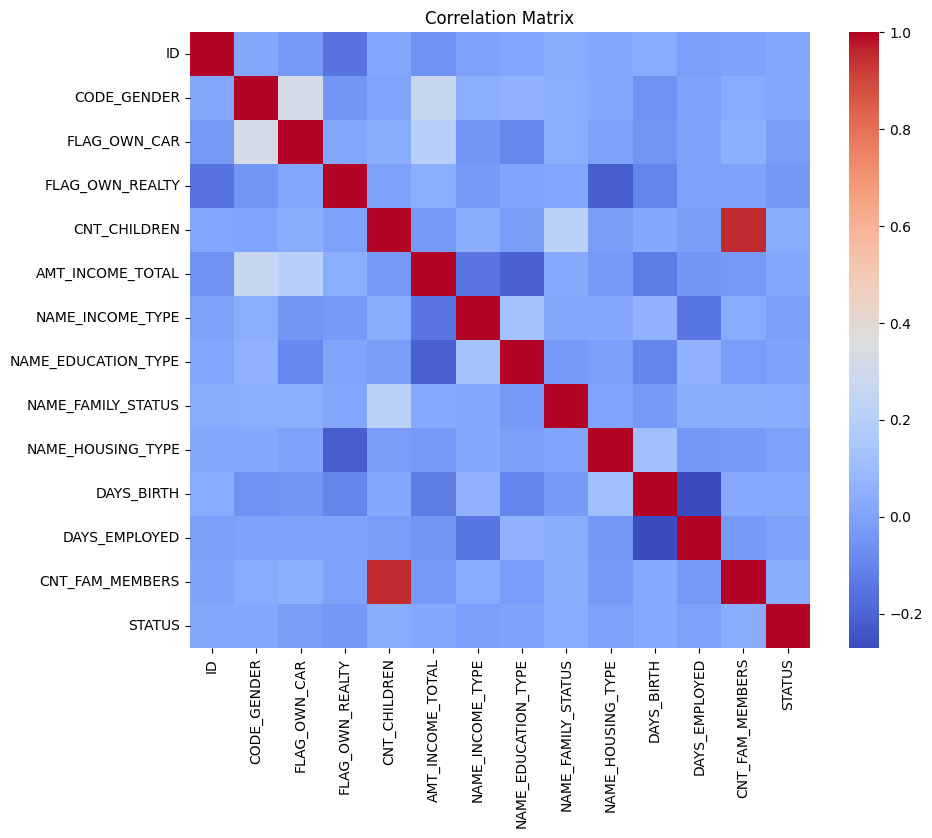

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap without displaying values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Data Splitting

In [ ]:

# We will use SMOTE (Synthetic Minority Over-sampling Technique) to avoid overfitting.

X = data.iloc[:,1:-1] # X value contains all the variables except labels
y = data.iloc[:,-1] # these are the labels
y

29        0
30        0
31        0
32        0
33        0
         ..
434779    1
434780    1
434782    1
434791    1
434805    1
Name: STATUS, Length: 9516, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
#  We will use the SMOTE algorithm to make up for the lack of data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [ ]:
# Let's compare the amount of data before and after the SMOTE algorithm.
a = y_train.value_counts()
b = y_balanced.value_counts()
print(a, "\n\n", b)
c = y_test.value_counts()
d = y_test_balanced.value_counts()
print(c, "\n\n", d)

0    6278
1     859
Name: STATUS, dtype: int64 

 0    6278
1    6278
Name: STATUS, dtype: int64
0    2093
1     286
Name: STATUS, dtype: int64 

 0    2093
1    2093
Name: STATUS, dtype: int64


# Model Training and Evaluation

In [ ]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.8041089
      0     1
0  1883   210
1   610  1483
Normalized confusion matrix
[[0.89966555 0.10033445]
 [0.29144768 0.70855232]]


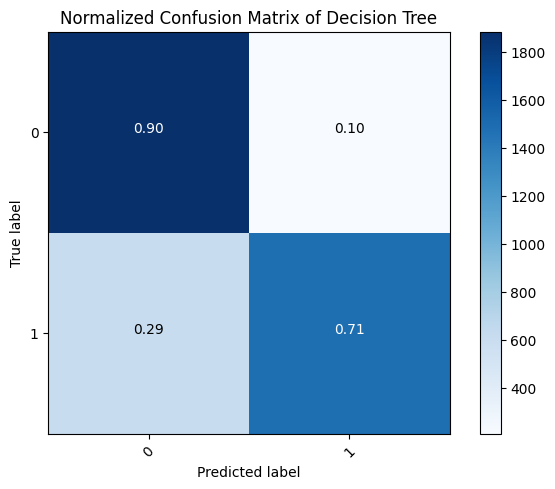

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

model1 = DecisionTreeClassifier(max_depth=16,
                               min_samples_split=8,
                               random_state=1024)

model1.fit(X_balanced, y_balanced)
y_predict = model1.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix of Decision Tree')

Accuracy Score is 0.8201147
      0     1
0  1897   196
1   557  1536
Normalized confusion matrix
[[0.90635452 0.09364548]
 [0.26612518 0.73387482]]


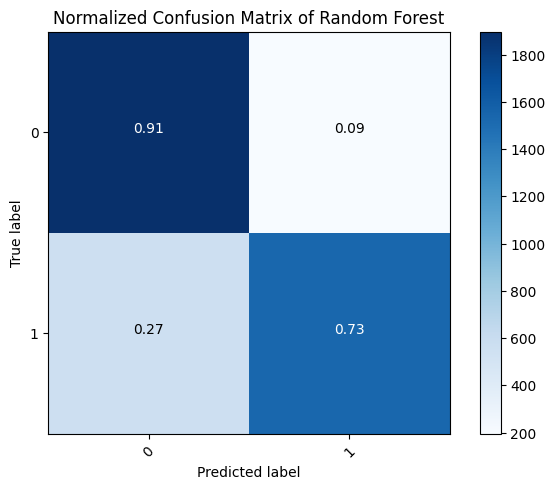

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=250,
                              max_depth=16,
                              min_samples_leaf=12
                              )

model2.fit(X_balanced, y_balanced)
y_predict = model2.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix of Random Forest')

# Feature Importance

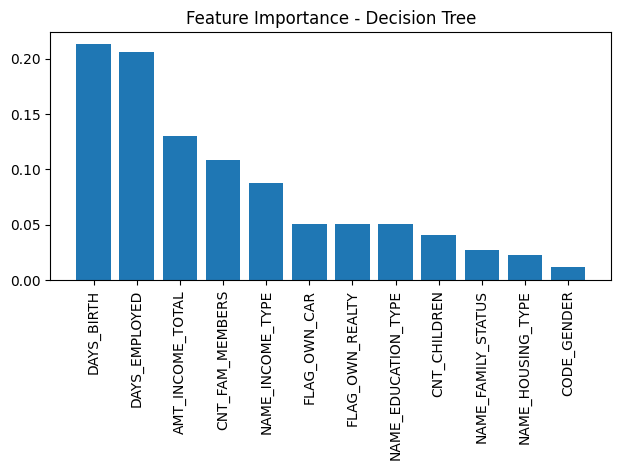

In [ ]:
# Plotting feature importance
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importance in descending order
feature_names = X_balanced.columns  # Assuming X_balanced is a DataFrame

plt.figure()
plt.title("Feature Importance - Decision Tree")
plt.bar(range(X_balanced.shape[1]), importances[indices], align="center")
plt.xticks(range(X_balanced.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_balanced.shape[1]])
plt.tight_layout()
plt.show()

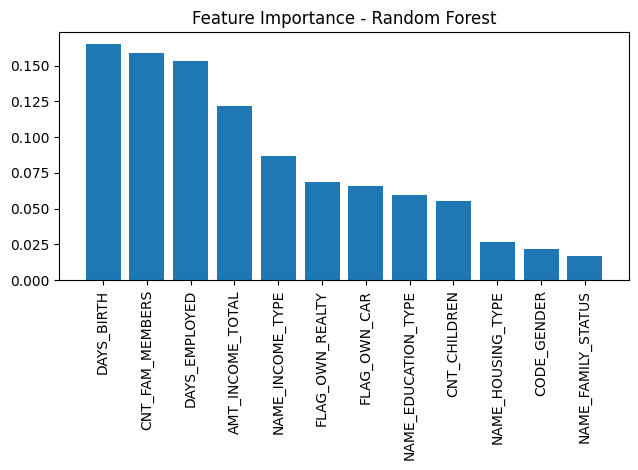

In [ ]:
# Plotting feature importance
importances = model2.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importance in descending order
feature_names = X_balanced.columns  # Assuming X_balanced is a DataFrame

plt.figure()
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_balanced.shape[1]), importances[indices], align="center")
plt.xticks(range(X_balanced.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_balanced.shape[1]])
plt.tight_layout()
plt.show()